In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/hirofumi48/162348.github.io/posts/2024/PX':
  os.chdir(r'/Users/hirofumi48/162348.github.io/posts/2024/PX')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_41496/2219919389.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap_external.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/zipimport.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/codecs.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/aliases.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/__init__.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/utf_8.py": 1727748346.0, "/opt/homebrew/Cellar/python@3.12/3.12.7/Frameworks/Python.

In [2]:
#| code-summary: プロット用の関数の準備
#| output: false
def plot_weighted_points(
    ax,
    x, a,
    y, b,
    title=None, x_label=None, y_label=None
):
  ax.scatter(x[:,0], x[:,1], s=5000*a, c='r', edgecolors='k', label=x_label)
  ax.scatter(y[:,0], y[:,1], s=5000*b, c='b', edgecolors='k', label=y_label)
  for i in range(np.shape(x)[0]):
      ax.annotate(str(i+1), (x[i,0], x[i,1]),fontsize=30,color='black')
  for i in range(np.shape(y)[0]):
      ax.annotate(str(i+1), (y[i,0], y[i,1]),fontsize=30,color='black')
  if x_label is not None or y_label is not None:
    ax.legend(fontsize=20)
  ax.axis('off')
  ax.set_title(title, fontsize=25)

def plot_assignement(
    ax,
    x, a,
    y, b,
    optimal_plan,
    title=None, x_label=None, y_label=None
):
  plot_weighted_points(
    ax=ax,
    x=x, a=a,
    y=y, b=b,
    title=None,
    x_label=x_label, y_label=y_label
  )
  for i in range(optimal_plan.shape[0]):
      for j in range(optimal_plan.shape[1]):
          ax.plot([x[i,0], y[j,0]], [x[i,1], y[j,1]], c='k', lw=30*optimal_plan[i,j], alpha=0.8)
  ax.axis('off')
  ax.set_title(title, fontsize=30)

def plot_assignement_1D(
    ax,
    x, y,
    title=None
):
  plot_points_1D(
    ax,
    x, y,
    title=None
  )
  x_sorted = np.sort(x)
  y_sorted = np.sort(y)
  assert len(x) == len(y), "x and y must have the same shape."
  for i in range(len(x)):
    ax.hlines(
        y=0,
        xmin=min(x_sorted[i], y_sorted[i]),
        xmax=max(x_sorted[i], y_sorted[i]),
        color='k',
        lw=10
    )
  ax.axis('off')
  ax.set_title(title, fontsize=30)

def plot_points_1D(
    ax,
    x, y,
    title=None
):
  n = len(x)
  a = np.ones(n) / n
  ax.scatter(x, np.zeros(n), s=1000*a, c='r')
  ax.scatter(y, np.zeros(n), s=1000*b, c='b')
  min_val = min(np.min(x), np.min(y))
  max_val = max(np.max(x), np.max(y))
  for i in range(n):
      ax.annotate(str(i+1), xy=(x[i], 0.005), size=30, color='r', ha='center')
  for j in range(n):
      ax.annotate(str(j+1), xy=(y[j], 0.005), size=30, color='b', ha='center')
  ax.axis('off')
  ax.plot(np.linspace(min_val, max_val, 10), np.zeros(10))
  ax.set_title(title, fontsize=30)

def plot_consistency(
    ax,
    reg_strengths,
    plan_diff, distance_diff
):
  ax[0].loglog(reg_strengths, plan_diff, lw=4)
  ax[0].set_ylabel('$||P^* - P_\epsilon^*||_F$', fontsize=25)
  ax[1].tick_params(which='both', size=20)
  ax[0].grid(ls='--')
  ax[1].loglog(reg_strengths, distance_diff, lw=4)
  ax[1].set_xlabel('Regularization Strength $\epsilon$', fontsize=25)
  ax[1].set_ylabel(r'$ 100 \cdot \frac{\langle C, P^*_\epsilon \rangle - \langle C, P^* \rangle}{\langle C, P^* \rangle} $', fontsize=25)
  ax[1].tick_params(which='both', size=20)
  ax[1].grid(ls='--')

<>:87: SyntaxWarning: invalid escape sequence '\e'
<>:91: SyntaxWarning: invalid escape sequence '\e'
<>:87: SyntaxWarning: invalid escape sequence '\e'
<>:91: SyntaxWarning: invalid escape sequence '\e'
/var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_41496/867410469.py:87: SyntaxWarning: invalid escape sequence '\e'
  ax[0].set_ylabel('$||P^* - P_\epsilon^*||_F$', fontsize=25)
/var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_41496/867410469.py:91: SyntaxWarning: invalid escape sequence '\e'
  ax[1].set_xlabel('Regularization Strength $\epsilon$', fontsize=25)


In [3]:
%pip install POT
%pip install cloudpickle

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this error.
    
    If you disable this error, we STRONGLY recommend that you additionally
    pass the '--user' flag to pip, or set 

Note: you may need to restart the kernel to use updated packages.


error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this error.
    
    If you disable this error, we STRONGLY recommend that you additionally
    pass the '--user' flag to pip, or set 

Note: you may need to restart the kernel to use updated packages.


In [4]:
import ot
import numpy as np
import os
from typing import Callable
import matplotlib.pyplot as plt

In [5]:
# Load the data
import pickle
from urllib.request import urlopen
import cloudpickle as cp

croissants = cp.load(urlopen('https://marcocuturi.net/data/croissants.pickle'))

bakery_pos = croissants['bakery_pos']
bakery_prod = croissants['bakery_prod']
cafe_pos = croissants['cafe_pos']
cafe_prod = croissants['cafe_prod']

print('Bakery productions =', bakery_prod)
print('Total number of croissants =', bakery_prod.sum())
print("")
print('Café sales =', cafe_prod)
print('Total number of croissants sold =', cafe_prod.sum())

Bakery productions = [31. 48. 82. 30. 40. 48. 89. 73.]
Total number of croissants = 441.0

Café sales = [82. 88. 92. 88. 91.]
Total number of croissants sold = 441.0


In [6]:
#| outputId: 5ce2d95f-8a07-4576-ba50-94c1db2e9093
bakery_prod = bakery_prod / bakery_prod.sum()
cafe_prod = cafe_prod / cafe_prod.sum()

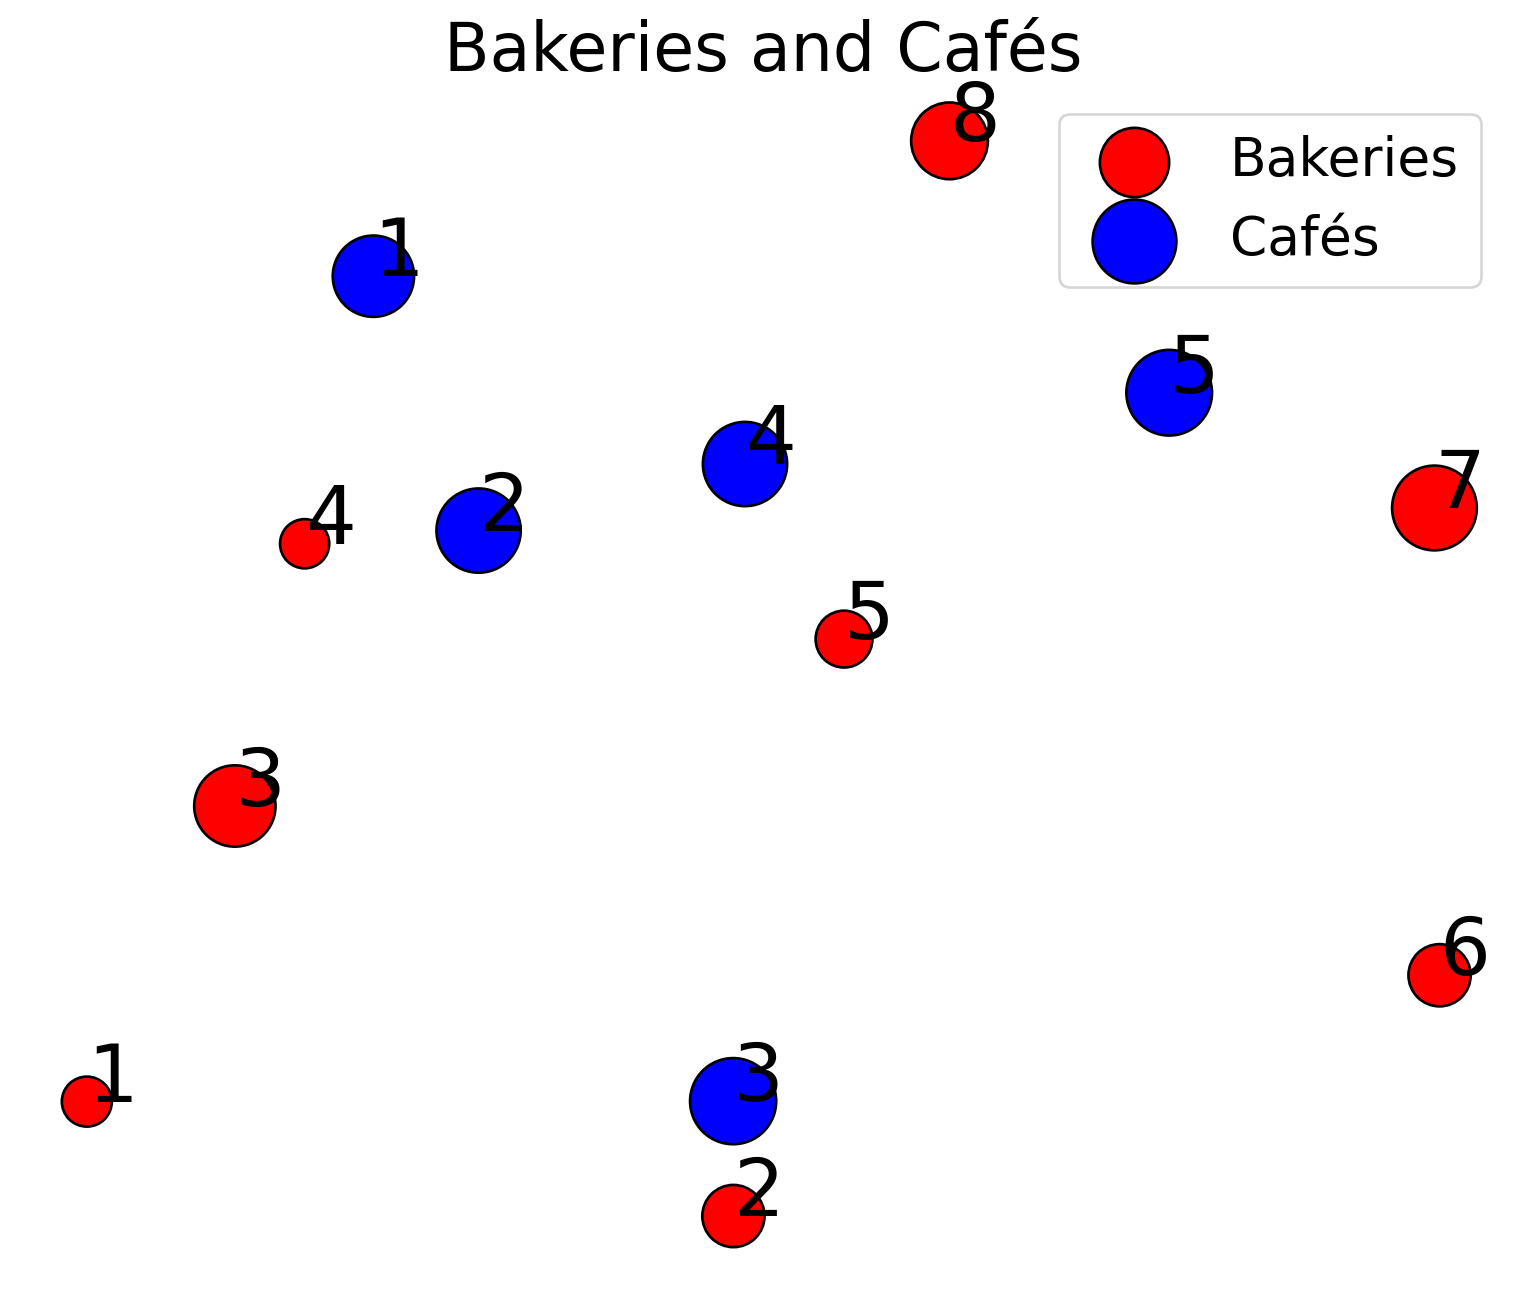

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_weighted_points(
    ax,
    x=bakery_pos,
    a=bakery_prod,
    x_label="Bakeries",
    y=cafe_pos,
    y_label="Cafés",
    b=cafe_prod,
    title="Bakeries and Cafés"
)
plt.show()

In [8]:
bakery_pos

array([[184.86464733, 201.8163543 ],
       [449.3486663 , 168.40784664],
       [245.41756746, 288.12166576],
       [273.95400109, 364.68282915],
       [494.58935376, 336.8424061 ],
       [738.19305545, 238.70491485],
       [736.10502372, 375.12298779],
       [537.74200949, 482.30861653]])

In [9]:
cafe_pos

array([[302.08410452, 442.78633642],
       [345.1162221 , 368.52123027],
       [449.226184  , 201.94529124],
       [454.08464888, 387.95508982],
       [627.60125204, 408.7770822 ]])

In [10]:
#| outputId: 9e68a2b2-34bb-4a79-fdb8-941a02bd63a8
def get_cost_matrix(
    x: np.ndarray,
    y: np.ndarray,
    cost_fn: Callable
) -> np.ndarray:
  """
  Compute the pairwise cost matrix between the n points in ``x`` and the m points in ``y``.
  It should output a matrix of size n x m.
  """
  return np.array([cost_fn(x_,y_) for x_ in x for y_ in y]).reshape(x.shape[0],y.shape[0])


# compute cost matrices for different costs
C_l1 = get_cost_matrix(
    x=bakery_pos, y=cafe_pos,
    cost_fn= lambda x,y : sum(np.abs(x-y))
  )

C_l2 = get_cost_matrix(
    x=bakery_pos, y=cafe_pos,
    cost_fn= lambda x,y : sum((x-y)**2)
)
C_l2_sq = get_cost_matrix(
    x=bakery_pos, y=cafe_pos,
    cost_fn= lambda x,y : sum(np.sqrt((x-y)**2))
)

# print shapes of cost matrices
print(
    f"Shape of C_l1: {C_l1.shape}\n"
    f"Shape of C_l2: {C_l2.shape}\n"
    f"Shape of C_l2_sq: {C_l2_sq.shape}"
)

Shape of C_l1: (8, 5)
Shape of C_l2: (8, 5)
Shape of C_l2_sq: (8, 5)


In [11]:
def compute_transport(
    C: np.ndarray,
    a: np.ndarray,
    b: np.ndarray,
    verbose: bool = False,
):
  """
  Compute the optimal transport plan and the optimal transport cost
  for cost matrix ``C`` and weight vectors $a$ and $b$.
  If ``verbose`` is set to True, it displays the results.
  """
  optimal_plan = ot.emd(a,b,C)
  optimal_cost = np.sum(optimal_plan * C)
  if verbose:
    print(
        f"optimal transport plan: \n{optimal_plan}"
    )
    print(
        f"transport cost: {optimal_cost}"
    )
  return optimal_plan, optimal_cost

In [12]:
# l1 geometry
print("l1 geometry:")
optimal_plan_l1_croissant, optimal_cost_l1_croissant = compute_transport(
    C=C_l1,
    a=bakery_prod,
    b=cafe_prod,
    verbose=True
)

l1 geometry:
optimal transport plan: 
[[0.07029478 0.         0.         0.         0.        ]
 [0.         0.         0.10884354 0.         0.        ]
 [0.05442177 0.13151927 0.         0.         0.        ]
 [0.         0.06802721 0.         0.         0.        ]
 [0.         0.         0.         0.09070295 0.        ]
 [0.         0.         0.09977324 0.00453515 0.00453515]
 [0.         0.         0.         0.         0.20181406]
 [0.06122449 0.         0.         0.10430839 0.        ]]
transport cost: 177.28420815406028


In [13]:
# l2 geometry
print("l2 geometry:")
optimal_plan_l2_croissant, optimal_cost_l2_croissant = compute_transport(
    C=C_l2,
    a=bakery_prod,
    b=cafe_prod,
    verbose=True
)

l2 geometry:
optimal transport plan: 
[[0.         0.07029478 0.         0.         0.        ]
 [0.         0.         0.10884354 0.         0.        ]
 [0.11791383 0.06802721 0.         0.         0.        ]
 [0.06802721 0.         0.         0.         0.        ]
 [0.         0.06122449 0.         0.02947846 0.        ]
 [0.         0.         0.09977324 0.00453515 0.00453515]
 [0.         0.         0.         0.         0.20181406]
 [0.         0.         0.         0.16553288 0.        ]]
transport cost: 24576.370543882178


In [14]:
# squared l2 geometry
print("squared l2 geometry:")
optimal_plan_l2_sq_croissant, optimal_cost_l2_sq_croissant = compute_transport(
    C=C_l2_sq,
    a=bakery_prod,
    b=cafe_prod,
    verbose=True
)

squared l2 geometry:
optimal transport plan: 
[[0.07029478 0.         0.         0.         0.        ]
 [0.         0.         0.10884354 0.         0.        ]
 [0.05442177 0.13151927 0.         0.         0.        ]
 [0.         0.06802721 0.         0.         0.        ]
 [0.         0.         0.         0.09070295 0.        ]
 [0.         0.         0.09977324 0.00453515 0.00453515]
 [0.         0.         0.         0.         0.20181406]
 [0.06122449 0.         0.         0.10430839 0.        ]]
transport cost: 177.28420815406028


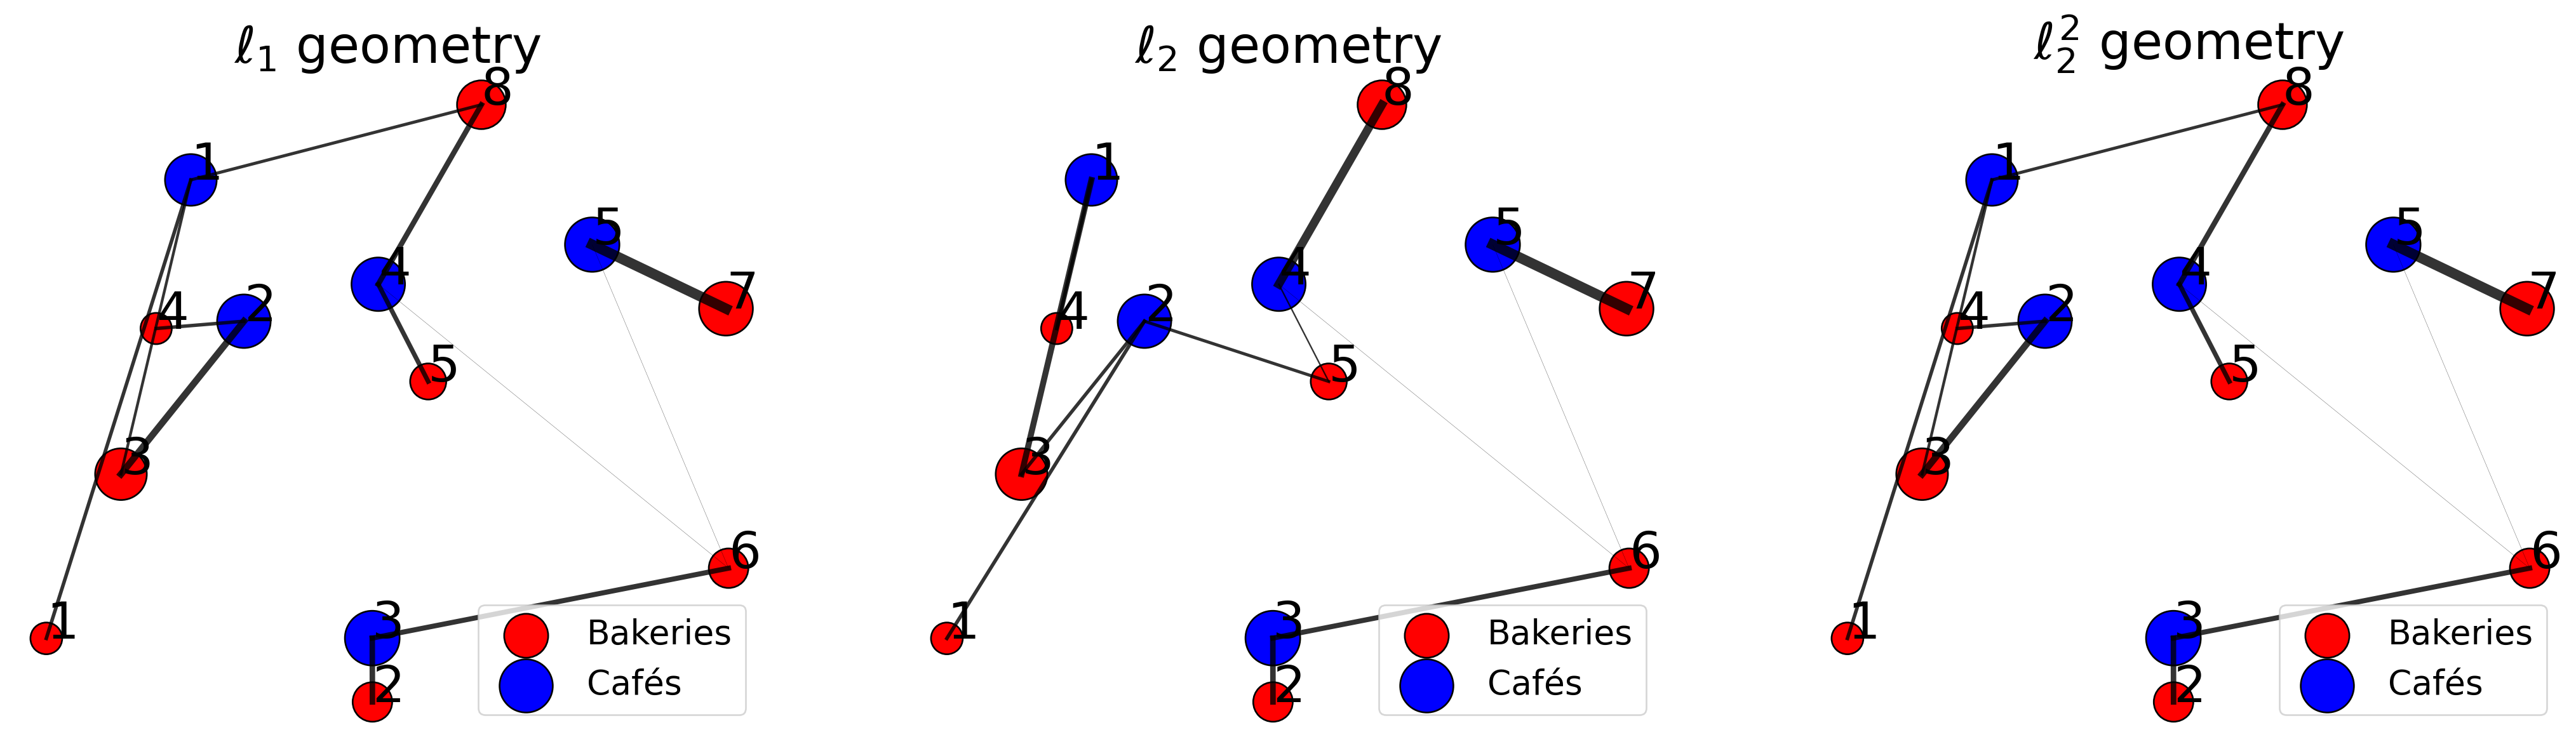

In [15]:
fig, ax = plt.subplots(
    1, 3, figsize=(9*3, 7)
)
plans = [optimal_plan_l1_croissant,
         optimal_plan_l2_croissant,
         optimal_plan_l2_sq_croissant]
titles = [r"$\ell_1$ geometry", r"$\ell_2$ geometry", r"$\ell_2^2$ geometry"]

for axes, plan, title in zip(ax, plans, titles):
  plot_assignement(
      ax=axes,
      x=bakery_pos, a=bakery_prod, x_label="Bakeries",
      y=cafe_pos, b=cafe_prod, y_label="Cafés",
      optimal_plan=plan,
      title=title
  )
plt.show()

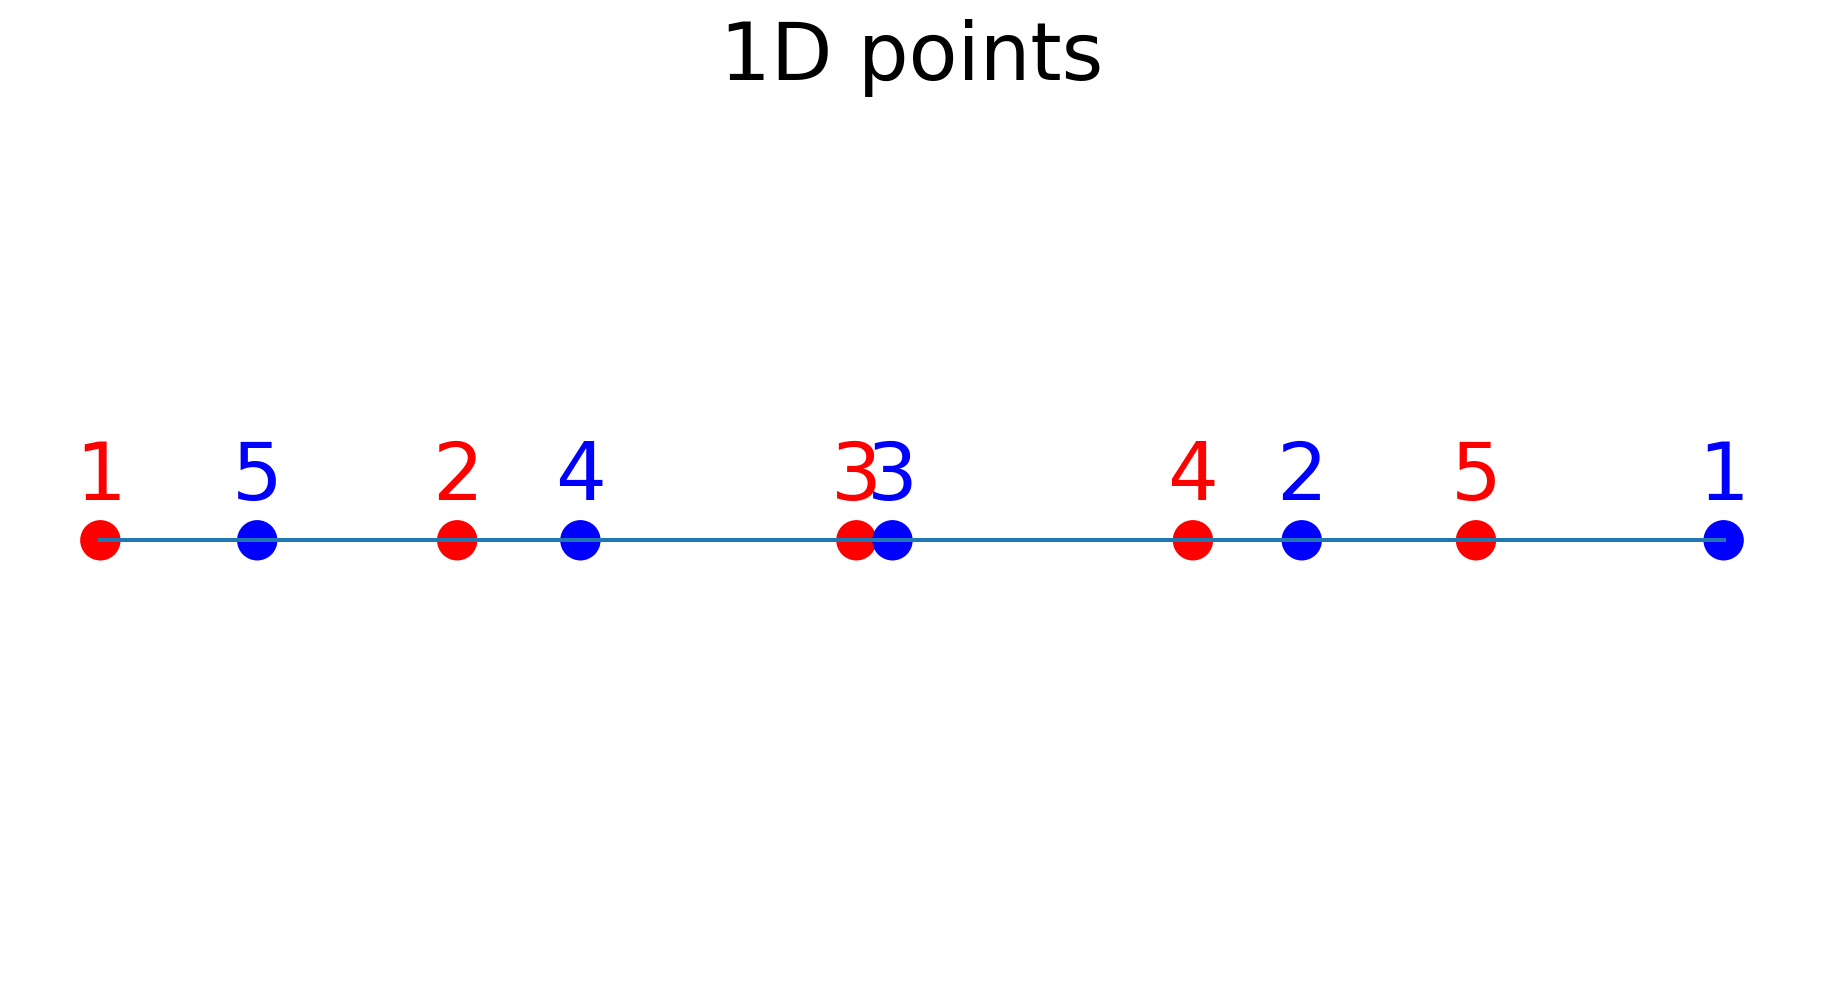

In [16]:
#| outputId: e7ad5225-5ac8-42bd-b442-1b48fdbb8fd9
# generate points
n = 5
x = np.arange(0, 2*n, 2) + .25 * np.random.normal(size=(n,))
a = np.ones(n) / n
y = np.arange(1, 2*n+1, 2) + .25 * np.random.normal(size=(n,))
np.random.shuffle(y)
b = np.ones(n) / n

# plot points
fig, ax = plt.subplots(figsize=(12, 6))
plot_points_1D(
    ax,
    x, y,
    title="1D points"
)

In [17]:
#| outputId: 23e277c0-b38f-4c1e-a9c5-fbd73d39c2bf
# sort the points
y_sorted = np.sort(y)

# get optimal assignment as a vector
assignment = np.argsort(y)

# transform it to a transport plan
optimal_plan = np.zeros((n,n))
for i, idx in enumerate(assignment):
    optimal_plan[i, idx] = 1 / n
print(
    f"optimal transport plan obtained by sorting the points:\n {optimal_plan}"
)

# The result doesn't match the lecturer's

optimal transport plan obtained by sorting the points:
 [[0.  0.  0.  0.  0.2]
 [0.  0.  0.  0.2 0. ]
 [0.  0.  0.2 0.  0. ]
 [0.  0.2 0.  0.  0. ]
 [0.2 0.  0.  0.  0. ]]


In [18]:
#| outputId: 320be5fd-7139-48fd-81b0-8491f131fb6a
# l1 geometry
print("l1 geometry:")
C_l1 = get_cost_matrix(
    x=x, y=y,
    cost_fn=lambda x,y: np.sum(np.abs(x - y))
)
optimal_plan_l1, optimal_cost_l1 = compute_transport(
    C=C_l1,
    a=a,
    b=b,
    verbose=True
)
print(
    f"is it equal to the one obtained by sorting the points? "
    f"{np.array_equal(optimal_plan_l1, optimal_plan)}"
)

l1 geometry:
optimal transport plan: 
[[0.  0.  0.  0.  0.2]
 [0.  0.  0.  0.2 0. ]
 [0.  0.  0.2 0.  0. ]
 [0.  0.2 0.  0.  0. ]
 [0.2 0.  0.  0.  0. ]]
transport cost: 0.7614832143146038
is it equal to the one obtained by sorting the points? True


In [19]:
#| outputId: 7541cb4f-8dbe-42e0-f51a-b59415be0933
# squared l2 geometry

def is_permutation(matrix):
    """
    Check if a given matrix is a permutation matrix.
    """
    n, m = matrix.shape
    if n != m:
        return False
    
    row_sum = np.sum(matrix, axis=1)
    col_sum = np.sum(matrix, axis=0)
    
    return np.all(row_sum == 1) and np.all(col_sum == 1) and np.all((matrix == 0) | (matrix == 1))

C_l2_sq = get_cost_matrix(
    x=x, y=y,
    cost_fn=lambda x,y: np.sum((x - y) ** 2)
)
optimal_plan_l2_sq, optimal_cost_l2_sq = compute_transport(
    C=C_l2_sq,
    a=a,
    b=b,
    verbose=True
)
print(
    f"is permutation matrix? {is_permutation(optimal_plan_l2_sq)}"
)
print(
    f"is it equal to the one obtained by sorting the points? "
    f"{np.array_equal(optimal_plan_l2_sq, optimal_plan)}"
)

optimal transport plan: 
[[0.  0.  0.  0.  0.2]
 [0.  0.  0.  0.2 0. ]
 [0.  0.  0.2 0.  0. ]
 [0.  0.2 0.  0.  0. ]
 [0.2 0.  0.  0.  0. ]]
transport cost: 0.7322121725011237
is permutation matrix? False
is it equal to the one obtained by sorting the points? True


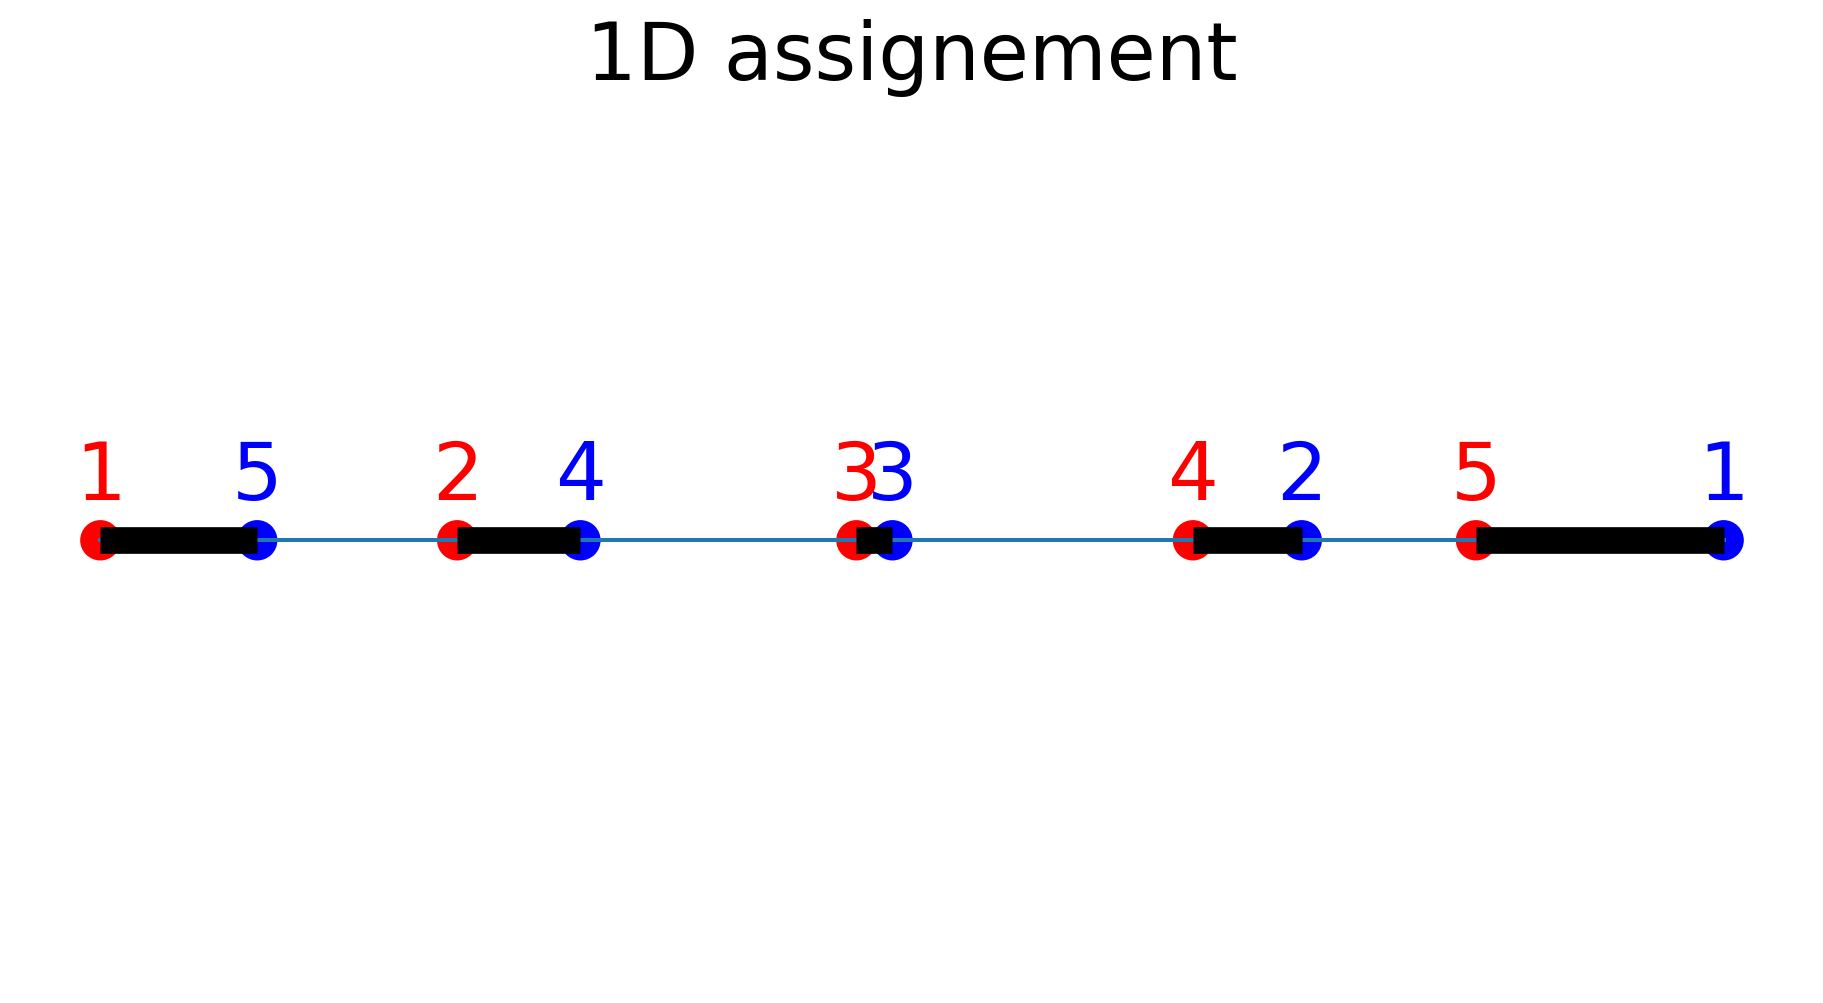

In [20]:
#| outputId: a141fcda-eba6-4c02-ecf5-51b232fe6478
fig, ax = plt.subplots(figsize=(12, 6))
plot_assignement_1D(
    ax,
    x, y,
    title="1D assignement"
)
plt.show()

In [21]:
def sinkhorn(
    a: np.ndarray,
    b: np.ndarray,
    C: np.ndarray,
    epsilon: float,
    max_iters: int = 100,
    tau: float = 1e-4
) -> np.ndarray:
    """
    Sinnkhorn's algorithm. It should output the optimal transport plan.
    """

    K = np.exp( -C / epsilon )
    n, m = a.shape[0], b.shape[0]
    v = np.ones((m,))
    for _ in range(max_iters):
        u = a / K.dot(v)
        v = b / K.transpose().dot(u)
    return u[:,None] * v[None,:] * K  # u_i, v_j, K_ij

In [22]:
P = sinkhorn(a, b, C_l2_sq, epsilon=1)
print(P.sum(axis=0))
print(P.sum(axis=1))

[0.2 0.2 0.2 0.2 0.2]
[0.19780276 0.19845835 0.19978797 0.2015813  0.20236961]


In [23]:
P = sinkhorn(a, b, C_l2_sq, epsilon=1, max_iters=1000)
print(P.sum(axis=0))
print(P.sum(axis=1))

[0.2 0.2 0.2 0.2 0.2]
[0.19999996 0.19999997 0.19999999 0.20000003 0.20000005]


In [24]:
def sinkhorn(
    a: np.ndarray,
    b: np.ndarray,
    C: np.ndarray,
    epsilon: float,
    max_iters: int = 100,
    tau: float = 1e-4
) -> np.ndarray:
    """
    Sinnkhorn's algorithm. It should output the optimal transport plan.
    """

    K = np.exp( -C / epsilon )
    n, m = a.shape[0], b.shape[0]
    v = np.ones((m,))
    for i in range(max_iters):
        u = a / K.dot(v)
        v = b / K.transpose().dot(u)
        if i % 10 == 0:
            # compute row sum D(u) K D(v) = u * Kv
            if np.sum(np.abs(u * K.dot(v) - a)) < tau:
                print('early termination: ' + str(i))
                break
    return u[:,None] * v[None,:] * K  # u_i, v_j, K_ij

In [25]:
P = sinkhorn(a, b, C_l2_sq, epsilon=1, max_iters=1000)
print(P.sum(axis=0))
print(P.sum(axis=1))

early termination: 460
[0.2 0.2 0.2 0.2 0.2]
[0.19997413 0.19998052 0.19999566 0.20002079 0.2000289 ]


In [26]:
P = sinkhorn(a, b, C_l2_sq, epsilon=0.1, max_iters=10000)
print(P.sum(axis=0))
print(P.sum(axis=1))

early termination: 3420
[0.2 0.2 0.2 0.2 0.2]
[0.19997932 0.20002068 0.2        0.19997077 0.20002923]


In [27]:
def compute_transport_sinkhorn(
    C: np.ndarray,
    a: np.ndarray,
    b: np.ndarray,
    epsilon: float,
    max_iters: int = 10_000,
    tau: float = 1e-4,
    verbose: bool = False,
):
  """
  Compute the entropic optimal transport plan and the entropic optimal transport cost
  for cost matrix ``C`` and weight vectors $a$ and $b$.
  If ``verbose`` is set to True, it displays the results.
  """
  optimal_plan_sinkhorn = sinkhorn(a, b, C, epsilon, max_iters, tau)
  optimal_cost_sinkhorn = np.sum(optimal_plan_sinkhorn * C)
  if verbose:
    print(
        f"entropic optimal transport plan: \n{optimal_plan_sinkhorn}"
    )
    print(
        f"entropic transport cost: {optimal_cost_sinkhorn}"
    )
  return optimal_plan_sinkhorn, optimal_cost_sinkhorn

In [28]:
#| outputId: 9f68f4d1-f6ce-41e9-990e-b0890b4084cb
# l1 geometry
print("l1 geometry:")
C_l1 = get_cost_matrix(
    x=bakery_pos, y=cafe_pos,
    cost_fn=lambda x,y: np.sum(np.abs(x - y))
)
epsilon = 1
optimal_plan_sinkhorn_l1_croissant, optimal_cost_sinkhorn_l1_croissant = compute_transport_sinkhorn(
    C=C_l1,
    a=bakery_prod,
    b=cafe_prod,
    epsilon=epsilon,
    verbose=True,
)

l1 geometry:
early termination: 5970
entropic optimal transport plan: 
[[2.70428936e-002 4.32583290e-002 1.34214268e-047 1.83509051e-086
  1.62880160e-235]
 [3.42773260e-084 1.30691077e-046 1.08827539e-001 1.90100995e-040
  1.68731081e-189]
 [7.15328153e-002 1.14425257e-001 4.99347632e-122 4.85411038e-086
  4.30844293e-235]
 [2.61705422e-002 4.18628990e-002 5.77469196e-189 1.77589404e-086
  1.57625961e-235]
 [1.25908361e-049 4.80057848e-012 2.70172554e-084 9.07098043e-002
  1.22406524e-115]
 [2.66904088e-052 1.01764013e-014 9.97892408e-002 1.92289196e-004
  8.84651301e-003]
 [5.95876320e-051 4.18968529e-019 7.18872709e-119 4.29294956e-003
  1.97502693e-001]
 [6.11947921e-002 7.27950530e-029 1.24902883e-128 1.04351442e-001
  5.20381800e-060]]
entropic transport cost: 177.27648952346257


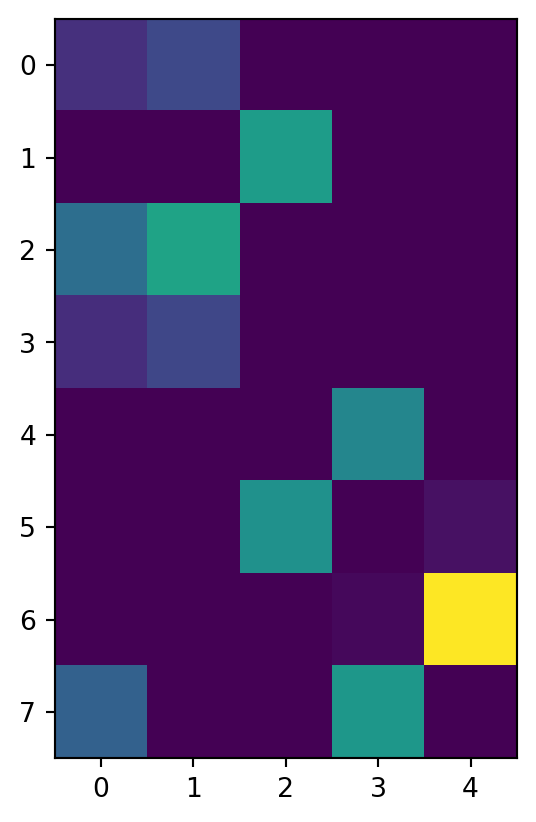

In [29]:
plt.imshow(optimal_plan_sinkhorn_l1_croissant)

In [30]:
#| outputId: 6ef09f42-96b6-42af-c4e0-a280acda8139
# l2 geometry
print("l2 geometry:")
C_l2 = get_cost_matrix(
    x=bakery_pos, y=cafe_pos,
    cost_fn=lambda x,y: np.linalg.norm(x - y, ord=2)
)
epsilon = np.mean(C_l2_sq) * 0.05 # compute the optimal value to avoid underflow
optimal_plan_sinkhorn_l2_croissant, optimal_cost_sinkhorn_l2_croissant = compute_transport_sinkhorn(
    C=C_l2,
    a=bakery_prod,
    b=cafe_prod,
    epsilon=epsilon,
    verbose=True
)

l2 geometry:
early termination: 7030
entropic optimal transport plan: 
[[1.46492270e-002 5.56512714e-002 6.11196548e-072 2.62373211e-090
  4.21880192e-233]
 [1.91870741e-072 8.30620009e-047 1.08836621e-001 5.76308404e-083
  5.56739456e-184]
 [4.20612097e-002 1.43894931e-001 3.17410778e-102 1.45977356e-093
  1.83237530e-240]
 [6.80324782e-002 4.44860547e-014 6.60608955e-153 1.03802277e-109
  2.55088239e-259]
 [2.72763191e-023 2.82569683e-007 5.85782131e-055 9.07087400e-002
  4.99833618e-106]
 [1.08688822e-027 2.28099921e-011 9.97801593e-002 4.49126742e-003
  4.56538618e-003]
 [4.48131599e-050 1.26320876e-043 4.50468090e-068 2.61475843e-027
  2.01783820e-001]
 [6.11981281e-002 2.39044711e-012 2.71210000e-101 1.04346478e-001
  6.41239413e-057]]
entropic transport cost: 139.50339276232242


In [31]:
#| outputId: fa8c9abe-a06e-4c76-d059-e97687851c26
# squared l2 geometry
print("squared l2 geometry:")
C_l2_sq = get_cost_matrix(
    x=bakery_pos, y=cafe_pos,
    cost_fn=lambda x,y: np.sum((x - y) ** 2)
)
epsilon = np.mean(C_l2_sq) * 0.05 # compute the optimal value to avoid underflow
optimal_plan_sinkhorn_l2_sq_croissant, optimal_cost_sinkhorn_l2_sq_croissant = compute_transport_sinkhorn(
    C=C_l2_sq,
    a=bakery_prod,
    b=cafe_prod,
    epsilon=epsilon,
    verbose=True
)

squared l2 geometry:
early termination: 390
entropic optimal transport plan: 
[[9.15185856e-03 6.11459020e-02 2.53416007e-06 9.36830019e-11
  5.88710931e-33]
 [1.98312263e-09 2.86298466e-05 1.08801507e-01 2.62245737e-07
  1.22762517e-18]
 [1.02592189e-01 8.33635462e-02 3.95058637e-08 1.25018168e-08
  7.16059834e-28]
 [6.36539082e-02 4.37874407e-03 9.20213996e-12 8.38044497e-09
  1.80226054e-26]
 [1.15178824e-03 4.78786088e-02 4.40333811e-04 4.12385828e-02
  1.04144097e-10]
 [1.27912352e-15 1.00116432e-09 9.93719135e-02 7.28353201e-04
  8.73056135e-03]
 [5.51097456e-13 1.50024181e-09 4.51186568e-07 4.17827621e-03
  1.97618514e-01]
 [9.39129734e-03 2.75105187e-03 4.51869851e-10 1.53400990e-01
  1.31200779e-07]]
entropic transport cost: 24883.330683517215


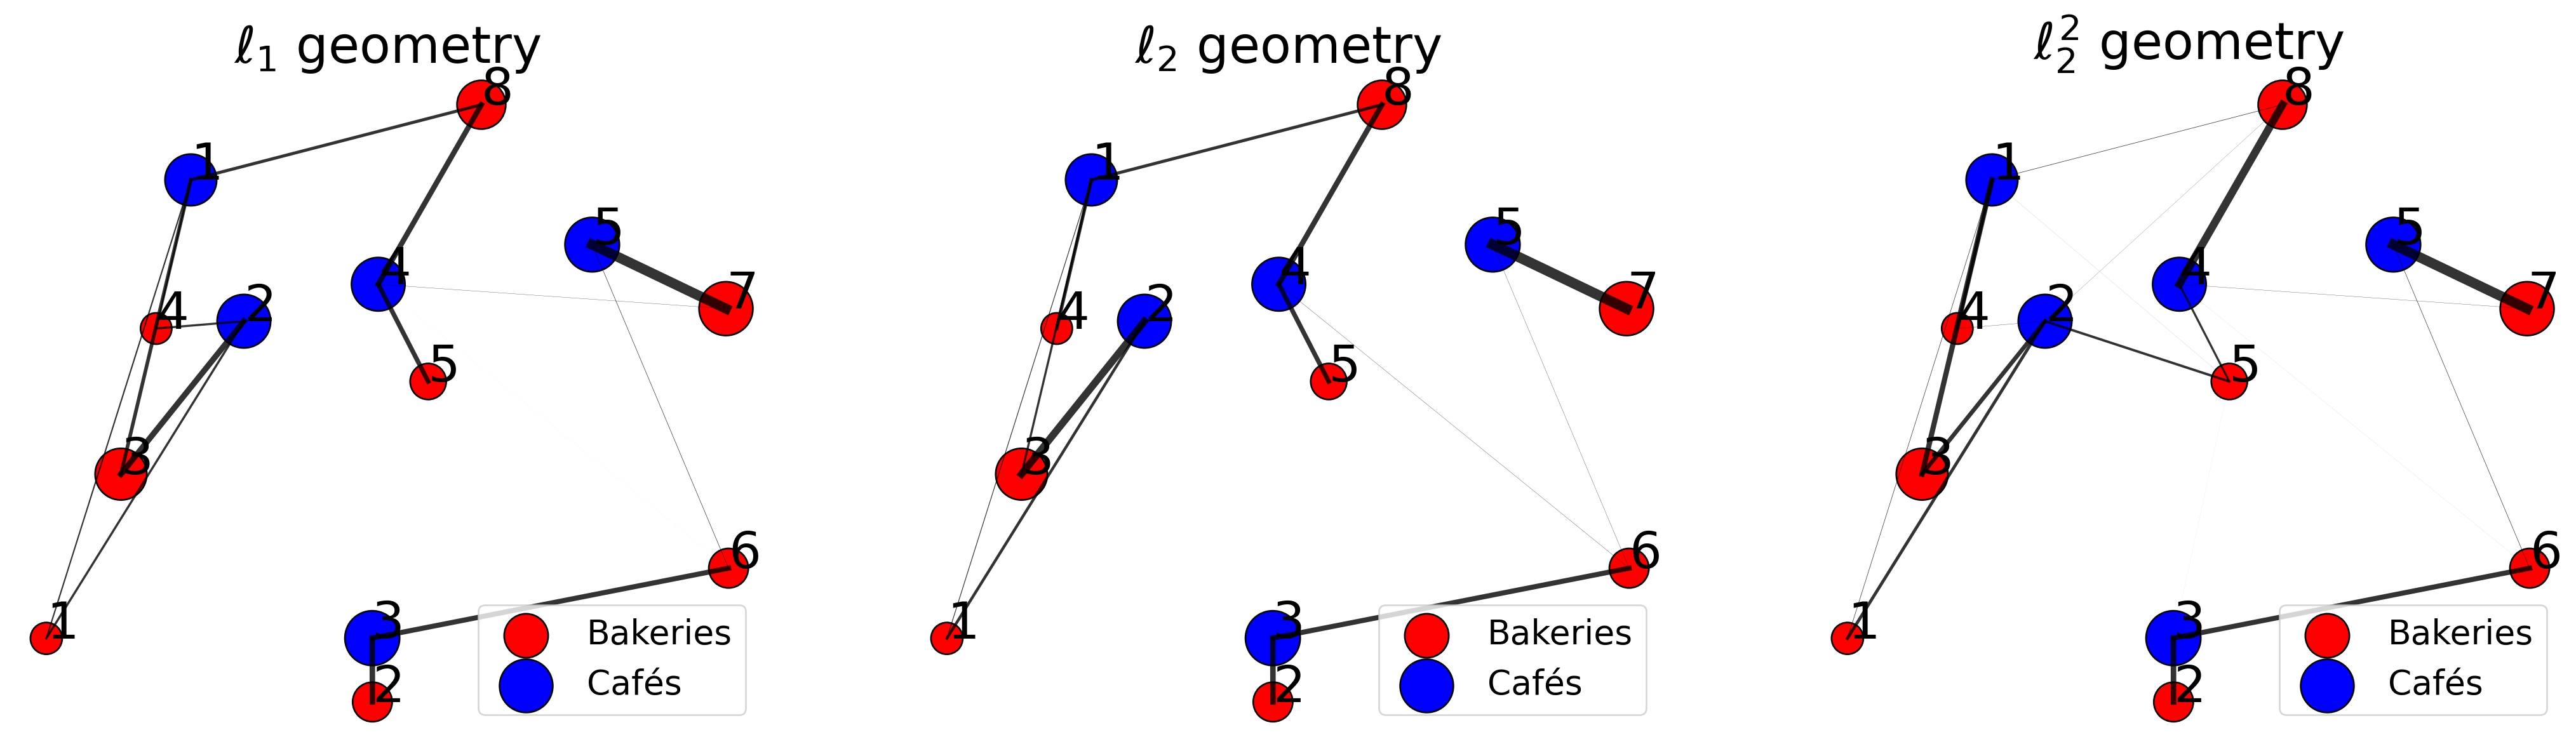

In [32]:
#| outputId: 329a7955-acc7-490f-89e6-e7407763932c
fig, ax = plt.subplots(
    1, 3, figsize=(9*3, 7)
)
plans = [optimal_plan_sinkhorn_l1_croissant,
         optimal_plan_sinkhorn_l2_croissant,
         optimal_plan_sinkhorn_l2_sq_croissant]

titles = [r"$\ell_1$ geometry", r"$\ell_2$ geometry", r"$\ell_2^2$ geometry"]

for axes, plan, title in zip(ax, plans, titles):
  plot_assignement(
      ax=axes,
      x=bakery_pos, a=bakery_prod, x_label="Bakeries",
      y=cafe_pos, b=cafe_prod, y_label="Cafés",
      optimal_plan=plan,
      title=title
  )
plt.show()

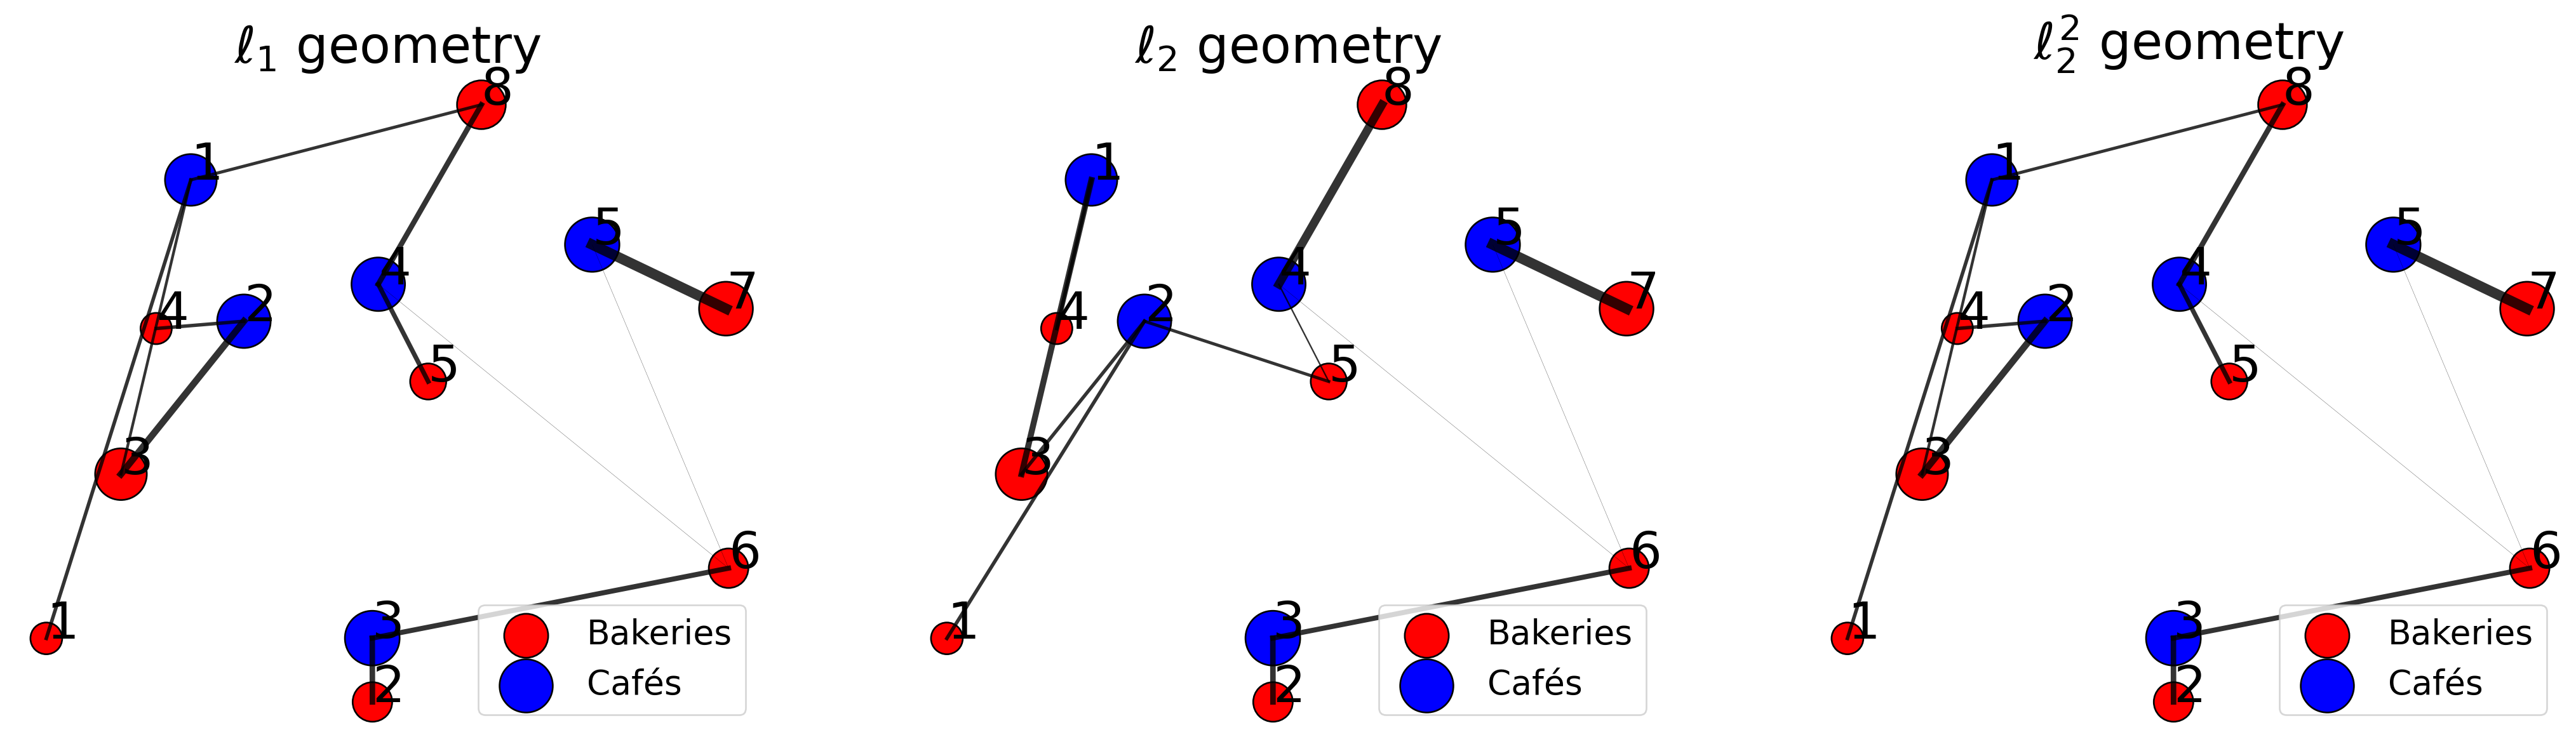

In [33]:
fig, ax = plt.subplots(
    1, 3, figsize=(9*3, 7)
)
plans = [optimal_plan_l1_croissant,
         optimal_plan_l2_croissant,
         optimal_plan_l2_sq_croissant]

titles = [r"$\ell_1$ geometry", r"$\ell_2$ geometry", r"$\ell_2^2$ geometry"]

for axes, plan, title in zip(ax, plans, titles):
  plot_assignement(
      ax=axes,
      x=bakery_pos, a=bakery_prod, x_label="Bakeries",
      y=cafe_pos, b=cafe_prod, y_label="Cafés",
      optimal_plan=plan,
      title=title
  )
plt.show()

early termination: 10
early termination: 10
early termination: 10


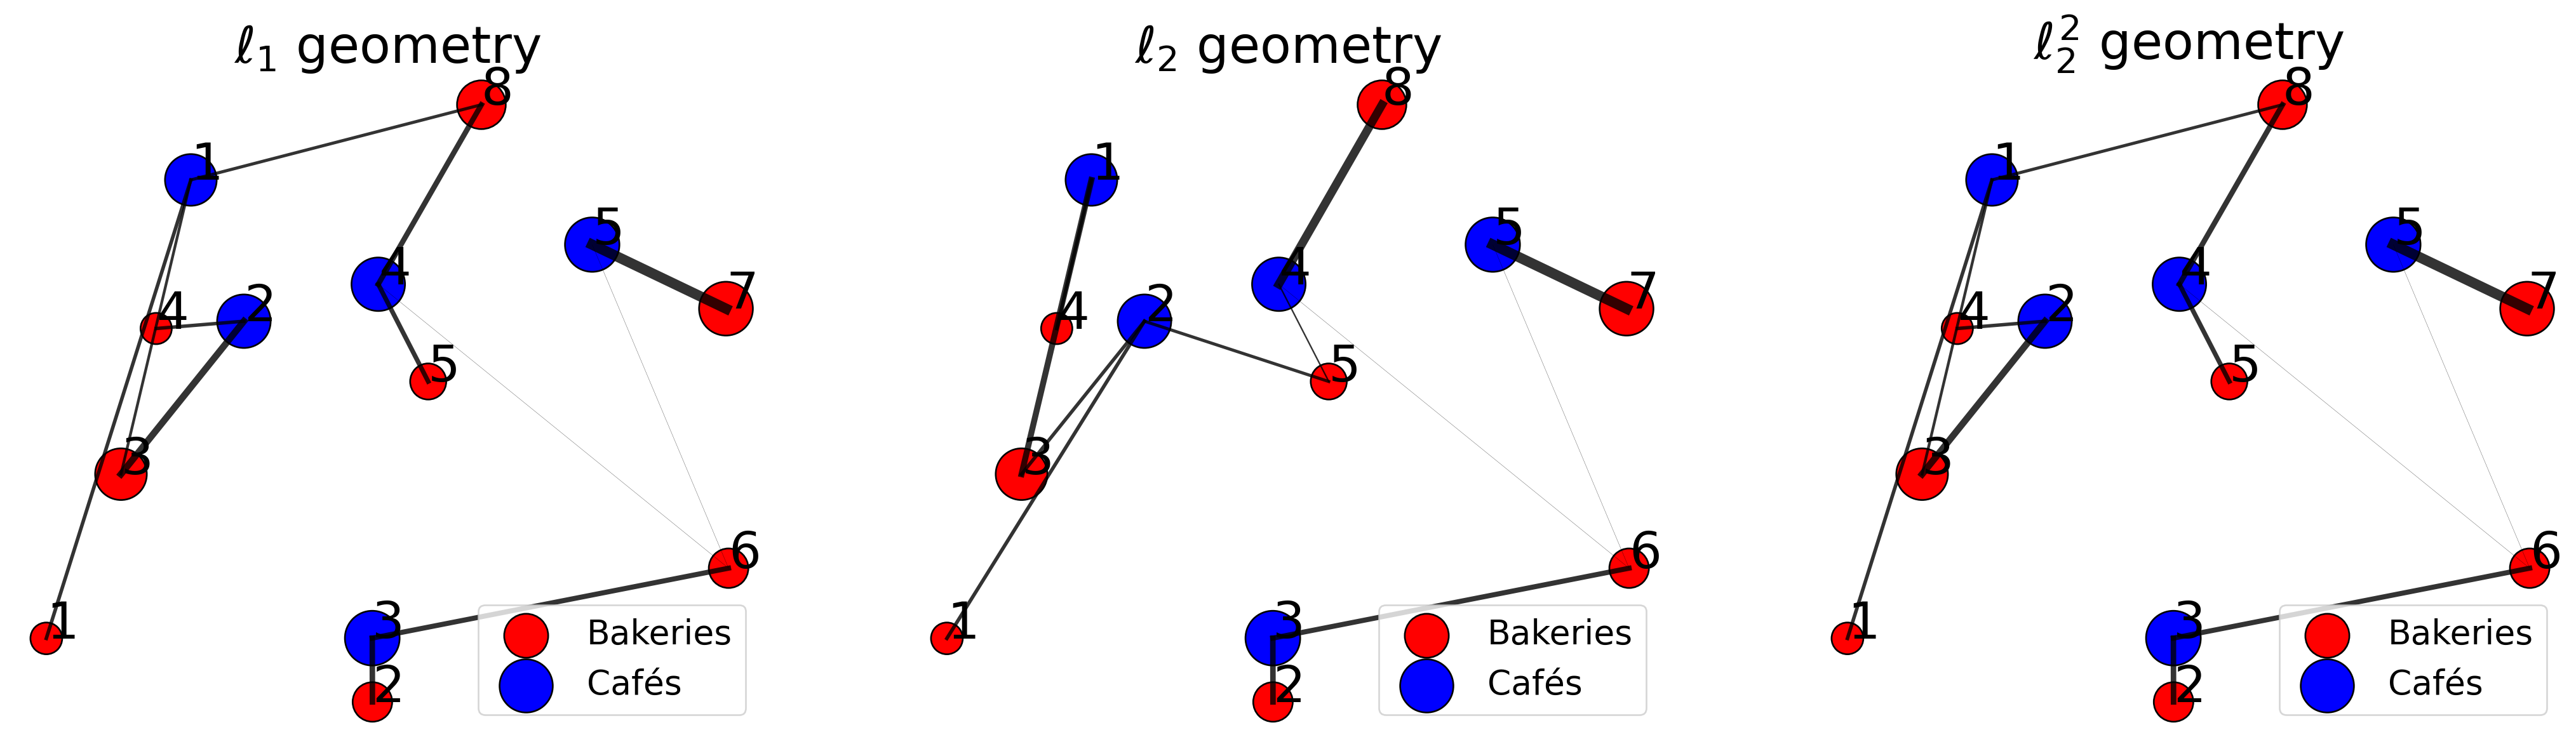

In [34]:
#| outputId: 861f6970-aac7-4b0c-ec5d-0936d100ef45
# l1 geometry
epsilon = 10 * np.mean(C_l1)
optimal_plan_sinkhorn_l1_croissant, optimal_cost_sinkhorn_l1_croissant = compute_transport_sinkhorn(
    C=C_l1,
    a=bakery_prod,
    b=cafe_prod,
    epsilon=epsilon,
    verbose=False,
)

# l2 geometry
epsilon = 10 * np.mean(C_l2)
optimal_plan_sinkhorn_l2_croissant, optimal_cost_sinkhorn_l2_croissant = compute_transport_sinkhorn(
    C=C_l2,
    a=bakery_prod,
    b=cafe_prod,
    epsilon=epsilon,
    verbose=False
)

# squared l2 geometry
epsilon = 10 * np.mean(C_l2_sq)
optimal_plan_sinkhorn_l2_sq_croissant, optimal_cost_sinkhorn_l2_sq_croissant = compute_transport_sinkhorn(
    C=C_l2_sq,
    a=bakery_prod,
    b=cafe_prod,
    epsilon=epsilon,
    verbose=False
)

fig, ax = plt.subplots(
    1, 3, figsize=(9*3, 7)
)
plans = [optimal_plan_l1_croissant,
         optimal_plan_l2_croissant,
         optimal_plan_l2_sq_croissant]
titles = [r"$\ell_1$ geometry", r"$\ell_2$ geometry", r"$\ell_2^2$ geometry"]

for axes, plan, title in zip(ax, plans, titles):
  plot_assignement(
      ax=axes,
      x=bakery_pos, a=bakery_prod, x_label="Bakeries",
      y=cafe_pos, b=cafe_prod, y_label="Cafés",
      optimal_plan=plan,
      title=title
  )
plt.show()

In [35]:
plan_diff = []
distance_diff = []
grid = np.linspace(0.01, 5, 100)
for epsilon_prime in grid:
  epsilon = epsilon_prime * np.mean(C_l2)
  optimal_plan_sinkhorn_l2_croissant, optimal_cost_sinkhorn_l2_croissant = compute_transport_sinkhorn(
      C=C_l2,
      a=bakery_prod,
      b=cafe_prod,
      epsilon=epsilon,
      verbose=False
  )
  assert optimal_cost_sinkhorn_l2_croissant != np.nan, (
      "Optimal cost is nan due to numerical instabilities."
  )
  plan_diff.append(
      np.sum(np.abs(optimal_plan_sinkhorn_l2_croissant - optimal_plan_l2_croissant))
  )
  distance_diff.append(
      optimal_cost_sinkhorn_l2_croissant - optimal_cost_l2_croissant
  )

early termination: 2460
early termination: 220
early termination: 50
early termination: 30
early termination: 20
early termination: 20
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early termination: 10
early t

/opt/homebrew/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


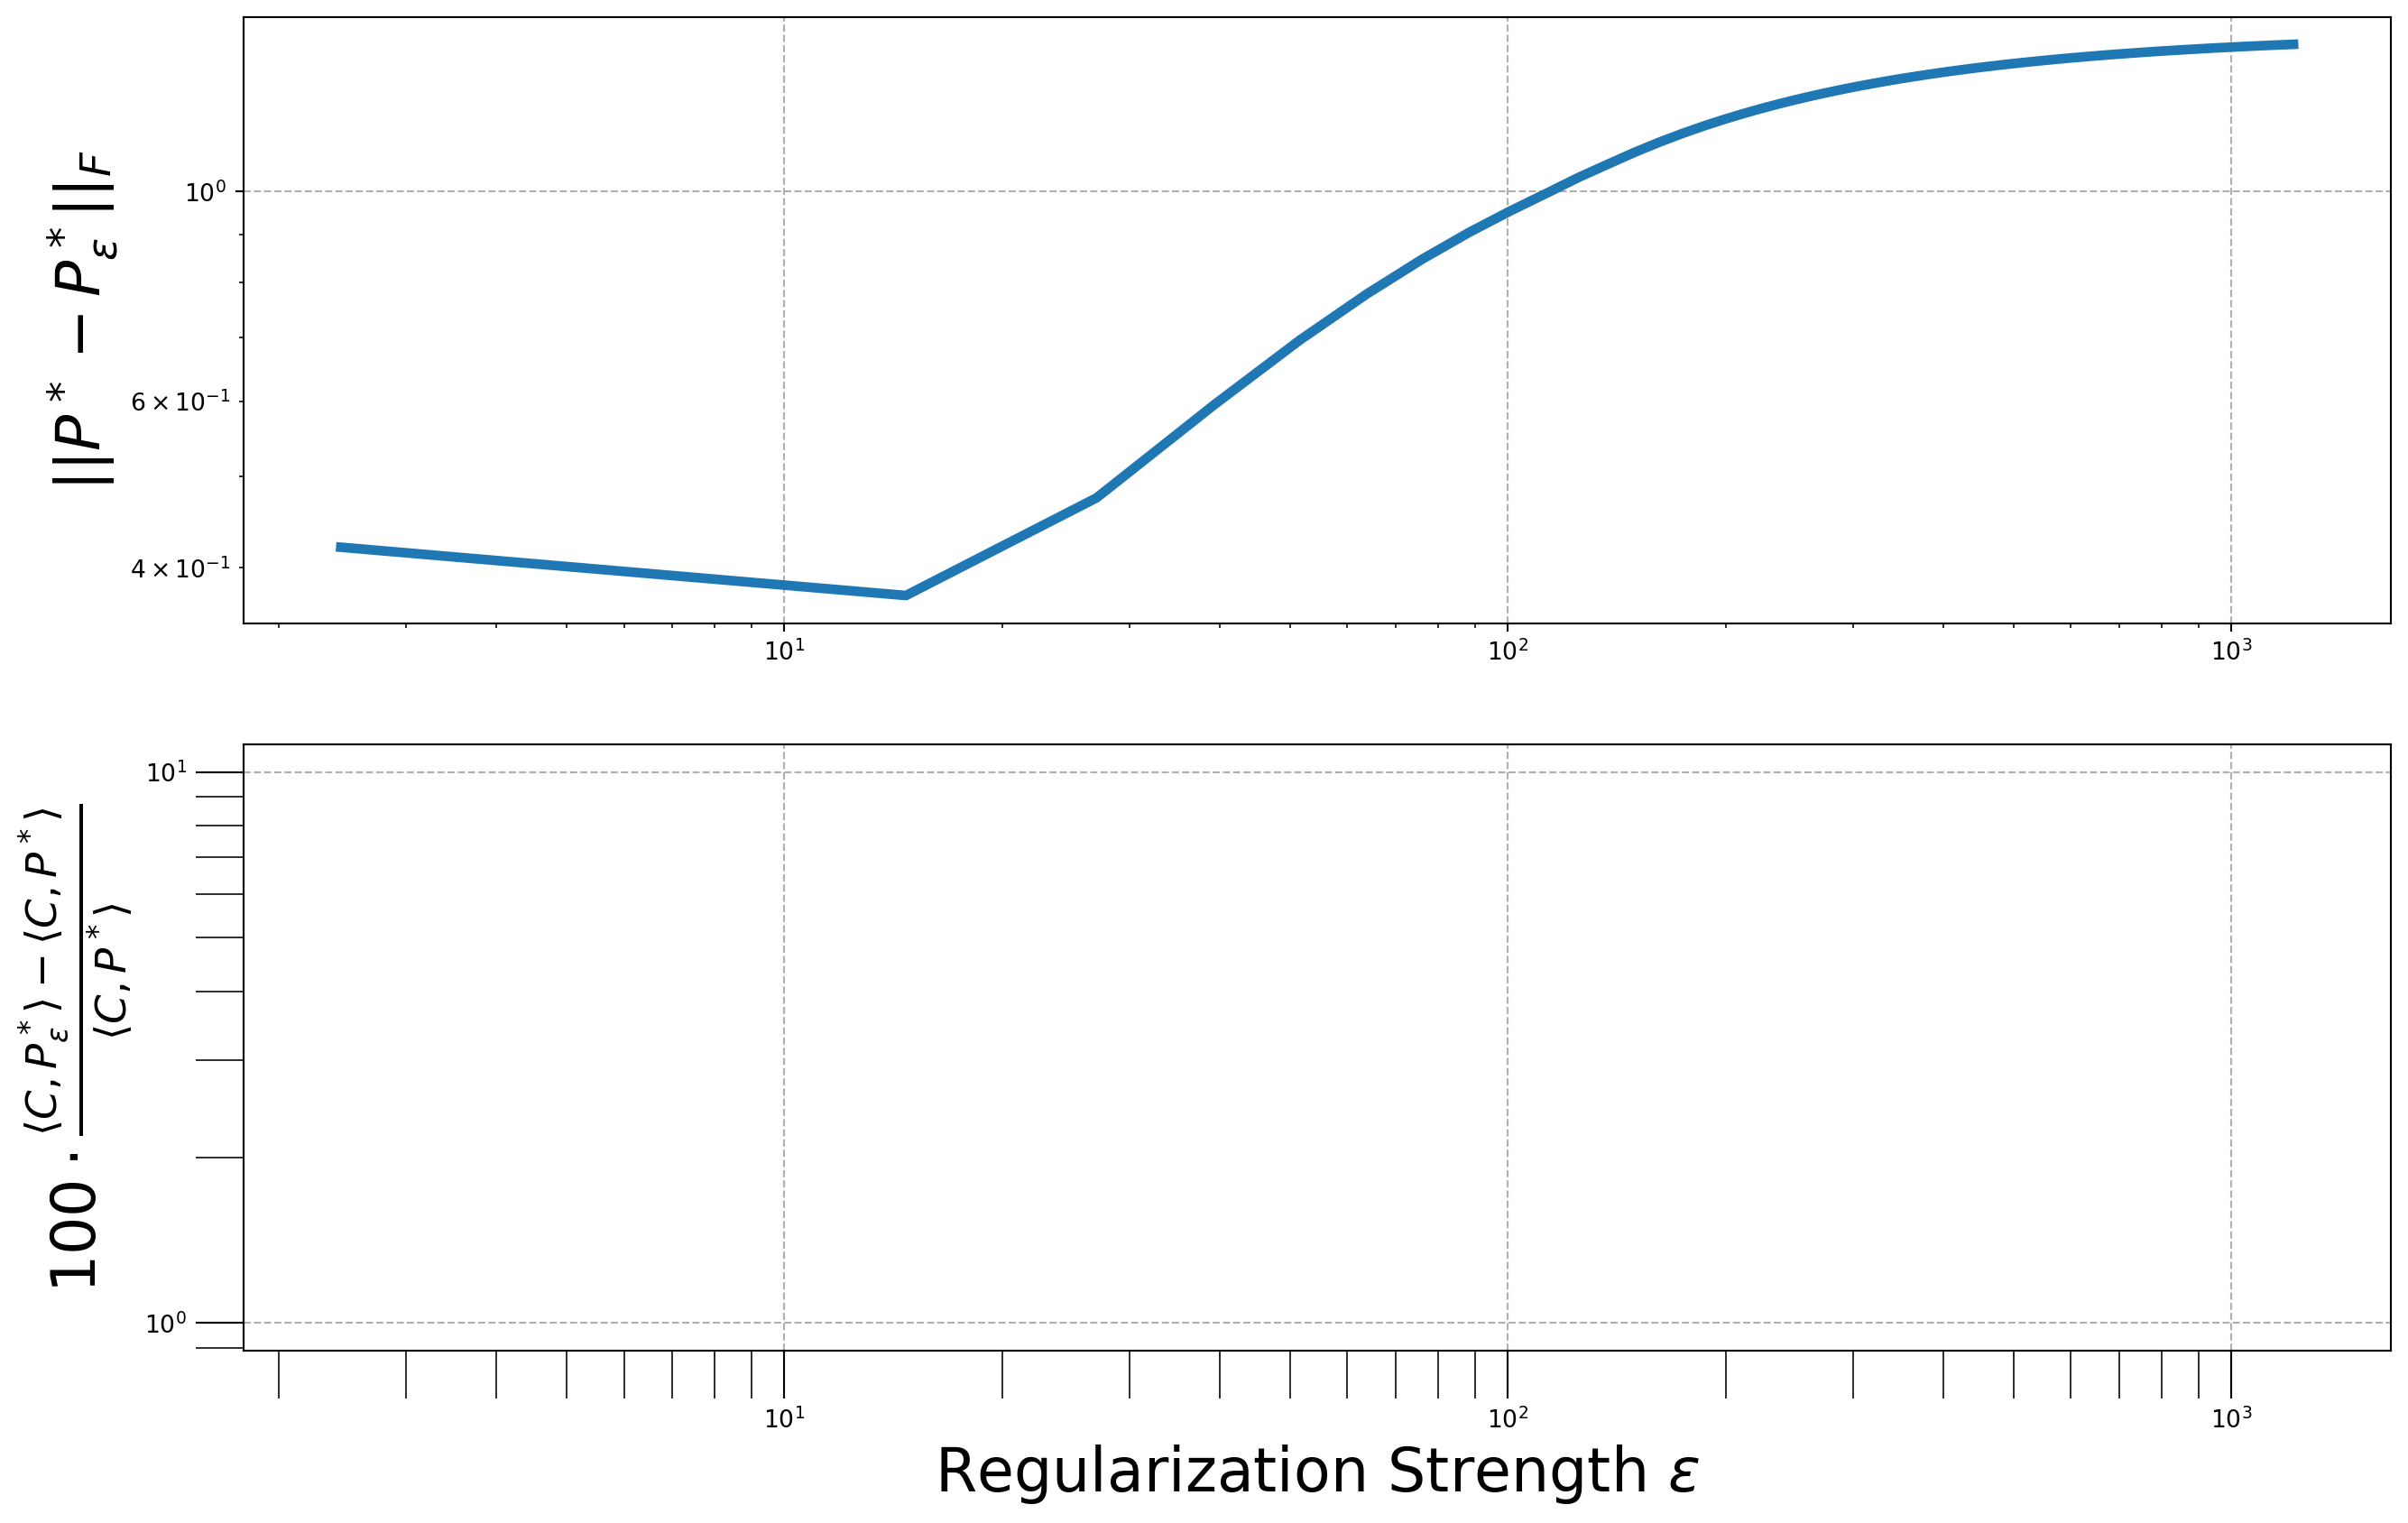

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(16, 5*2))
reg_strengths = np.mean(C_l2) * grid
plot_consistency(
    ax,
    reg_strengths,
    plan_diff,
    distance_diff
)

plt.show()

In [37]:
#| outputId: 8e7c9ade-b5c5-40ca-e624-0353e1feab1f
%pip install ott-jax

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this error.
    
    If you disable this error, we STRONGLY recommend that you additionally
    pass the '--user' flag to pip, or set 

Note: you may need to restart the kernel to use updated packages.


In [38]:
#| outputId: 5cf76243-4b95-46d7-ffe6-6fde9cedc07d
import jax
import jax.numpy as jnp
import jax.random as random
import ott
from ott.geometry import costs, pointcloud
from ott.problems.linear import linear_problem
from ott.solvers.linear import sinkhorn

In [39]:
#| outputId: 102dd072-941c-4376-8da0-243d2d63ae52
d = 5
u = 5 * jnp.ones(5)
Id = jnp.eye(5)
print(type(u))
print(f"u = {u}")
print(f"Id = {Id}")
print(f"Id @ u = {jnp.dot(Id, u)}")
print(f"sum(u) = {jnp.sum(u)}")
print(f"var(u) = {jnp.var(u)}")

<class 'jaxlib.xla_extension.ArrayImpl'>
u = [5. 5. 5. 5. 5.]
Id = [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Id @ u = [5. 5. 5. 5. 5.]
sum(u) = 25.0
var(u) = 0.0


In [40]:
#| outputId: 40386ca7-8e5b-4019-d976-ca6bad24c043
rng = jax.random.PRNGKey(0)
n, d = 13, 2
x = jax.random.normal(rng, (n, d))
print(f"x = {x}")

x = [[ 2.516351   -1.3947194 ]
 [-0.8633262   0.6413567 ]
 [-0.37789643 -0.6044598 ]
 [ 1.9069     -0.17918469]
 [-0.7583423  -0.5160155 ]
 [ 1.2666148  -0.12342127]
 [ 0.28430256 -0.17251171]
 [ 1.0661486   1.5814103 ]
 [-2.0284636  -0.13168257]
 [-0.14515765  0.21532312]
 [-0.69525063 -0.9314128 ]
 [-0.89809936 -0.25272107]
 [-0.34937173  1.8394127 ]]


In [41]:
#| outputId: c9c452b7-a183-4e2a-a161-672e75e6514c
rng1, rng2, rng3 = jax.random.split(rng, 3)
a = jax.random.normal(rng1, (n, d))
b = jax.random.normal(rng2, (n, d))
c = jax.random.normal(rng2, (n, d))
print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")

a = [[-0.38696066 -0.96707183]
 [ 1.0078175  -0.6096286 ]
 [-1.153353    1.0749092 ]
 [-1.2452031  -0.63885343]
 [ 0.01121208  0.2842425 ]
 [ 0.5296049   0.26609063]
 [ 0.8728492   1.0844501 ]
 [ 1.4472795  -0.82503337]
 [-0.41826957  0.21321987]
 [ 1.9602116   0.17687395]
 [-0.9978761  -2.0551765 ]
 [-0.4094941  -1.4577458 ]
 [-1.0969195  -0.66684234]]
b = [[ 0.10911155 -0.45371595]
 [ 0.12062439 -0.06927001]
 [ 0.00600028  2.3732579 ]
 [-0.17656058  1.7653493 ]
 [-0.06429235  0.487175  ]
 [-1.1079016  -1.0277865 ]
 [-0.0553451  -0.28271845]
 [-0.9633478  -0.05370665]
 [ 0.20281292 -0.16658288]
 [ 0.8015828  -0.61697495]
 [-0.30176872 -1.1862007 ]
 [-3.106658   -0.03262986]
 [ 0.53711027  0.21359496]]
c = [[ 0.10911155 -0.45371595]
 [ 0.12062439 -0.06927001]
 [ 0.00600028  2.3732579 ]
 [-0.17656058  1.7653493 ]
 [-0.06429235  0.487175  ]
 [-1.1079016  -1.0277865 ]
 [-0.0553451  -0.28271845]
 [-0.9633478  -0.05370665]
 [ 0.20281292 -0.16658288]
 [ 0.8015828  -0.61697495]
 [-0.30176872 

In [42]:
# generate data
rng = jax.random.PRNGKey(0)
rng1, rng2 = jax.random.split(rng, 2)
n, m, d = 13, 17, 2
x = jax.random.normal(rng1, (n, d))
y = jax.random.normal(rng2, (m, d)) + 1
a = jnp.ones(n) / n
b = jnp.ones(m) / m

In [43]:
# define geometry
geom = pointcloud.PointCloud(
    x=x, y=y,
    cost_fn=costs.Euclidean(),
    epsilon=1e-1,
    relative_epsilon=True
)

In [44]:
# create optimization problem
ot_prob = linear_problem.LinearProblem(geom, a=a, b=b)

# create sinkhorn solver
solver = sinkhorn.Sinkhorn(ot_prob)

# solve the OT problem
ot_sol = solver(ot_prob)

In [45]:
#| outputId: e96f56dd-306e-46f9-b1aa-bce66204af1a
print(
    " Sinkhorn has converged: ",
    ot_sol.converged,
    "\n",
    "Error upon last iteration: ",
    ot_sol.errors[(ot_sol.errors > -1)][-1],
    "\n",
    "Sinkhorn required ",
    jnp.sum(ot_sol.errors > -1),
    " iterations to converge. \n",
    "entropic OT cost: ",
    jnp.sum(ot_sol.matrix * ot_sol.geom.cost_matrix),
)

 Sinkhorn has converged:  True 
 Error upon last iteration:  0.00019063428 
 Sinkhorn required  5  iterations to converge. 
 entropic OT cost:  29.436863
